Problem: A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

Hypothesis: The bank's credit terms are too strict to maintain customers

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport
from yellowbrick.model_selection import FeatureImportances
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from yellowbrick.datasets import load_credit
from yellowbrick.classifier import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from yellowbrick.datasets import load_spam
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.model_selection import train_test_split as tts
from imblearn.over_sampling import RandomOverSampler

In [2]:
df_credit = pd.read_csv('BankChurners.csv')
df_credit.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df_credit.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


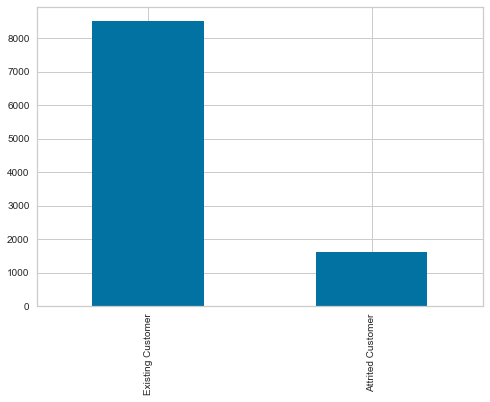

In [4]:
df_credit.Attrition_Flag.value_counts().plot(kind='bar')

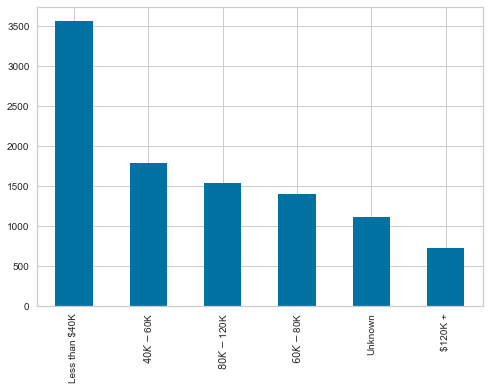

In [5]:
df_credit.Income_Category.value_counts().plot(kind='bar')

In [6]:
df_credit.insert(0,"Age_groups","")
df_credit["Age_groups"] = pd.cut(df_credit['Customer_Age'], 10)
df_credit.insert(0,"Credit_Limit_Groups","")
df_credit["Credit_Limit_Groups"] = pd.cut(df_credit['Credit_Limit'], 10)

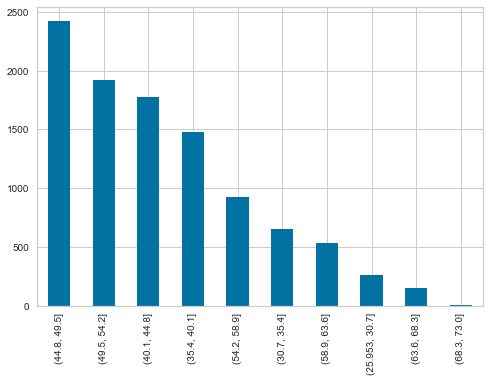

In [7]:
df_credit.Age_groups.value_counts().plot(kind='bar')

In [8]:
df = pd.get_dummies(df_credit[['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category',
                              'Age_groups','Credit_Limit_Groups']],dummy_na=True)

In [9]:
df

,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Attrition_Flag_nan,Gender_F,Gender_M,Gender_nan,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,...,"Credit_Limit_Groups_(4746.07, 8053.84]","Credit_Limit_Groups_(8053.84, 11361.61]","Credit_Limit_Groups_(11361.61, 14669.38]","Credit_Limit_Groups_(14669.38, 17977.15]","Credit_Limit_Groups_(17977.15, 21284.92]","Credit_Limit_Groups_(21284.92, 24592.69]","Credit_Limit_Groups_(24592.69, 27900.46]","Credit_Limit_Groups_(27900.46, 31208.23]","Credit_Limit_Groups_(31208.23, 34516.0]",Credit_Limit_Groups_nan
0,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10123,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10124,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
10125,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [10]:
credit_dummy = df['Attrition_Flag_Attrited Customer']
other_data = df.iloc[:,3:]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(other_data, credit_dummy, test_size = 0.2)

In [12]:
model = tree.DecisionTreeClassifier()

In [13]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
pred = model.predict(X_test)
score = accuracy_score(y_test,pred)
score

0.78035538005923

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


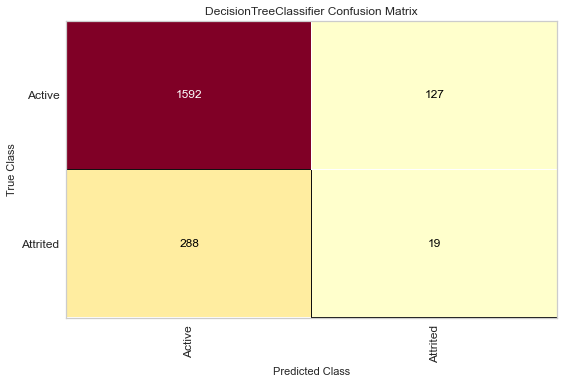

<Figure size 576x396 with 0 Axes>

In [15]:
#Load the classification dataset
X = other_data
y = credit_dummy

#Create the train and test data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

# Instantiate the visualizer with the classification model
confusion_matrix(
    tree.DecisionTreeClassifier(),
    X_train, y_train, X_test, y_test,
    classes=['Active', 'Attrited']
)
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


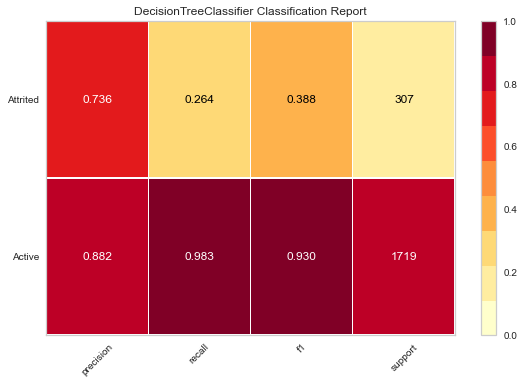

In [16]:
target = ['Active', 'Attrited']
visualizer = ClassificationReport(model, classes=target, support=True)
visualizer.fit(X_train, y_train)      
visualizer.score(X_test, y_test)  
visualizer.show()

In [27]:
model = MultinomialNB()

In [28]:
model.fit(X_train,y_train)

MultinomialNB()

In [29]:
model.score(X_test, y_test)

0.8484698914116485

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


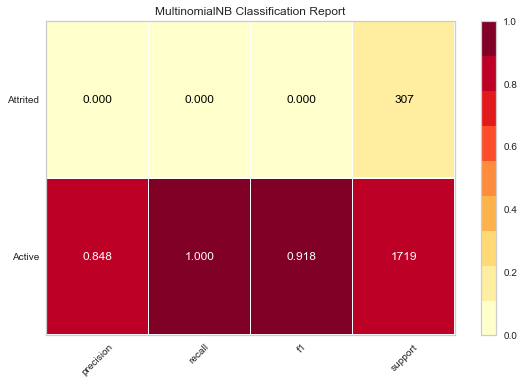

In [30]:
target = ['Active', 'Attrited']
visualizer = ClassificationReport(model, classes=target, support=True)
visualizer.fit(X_train, y_train)      
visualizer.score(X_test, y_test)  
visualizer.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


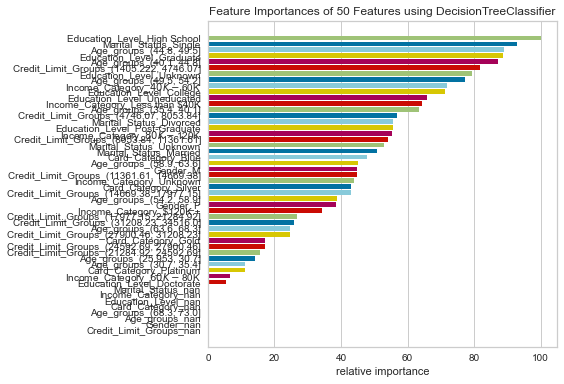

In [17]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(model)
viz.fit(X_train, y_train)
viz.show()